## Numerical Analysis

### Stock Market Analysis

Stock analysis involves comparing a company's current financial statement to its financial statements in previous years to give an investor a sense of whether the company is growing, stable, or deteriorating.

###### Performed By : Muatif Shaikh 

In [1]:
# Installing yfinance to download data from Yahoo finance
!pip install yfinance --upgrade --quiet

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# Downloading the data of BSE SENSEX from '01-01-2015' to '12-06-2021'
bse_data = yf.download("^BSESN", start = '2015-01-01', end = '2021-06-12')

[*********************100%***********************]  1 of 1 completed


##### Checking the statiscal description of data

In [4]:
bse_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [5]:
bse_data.shape

(1581, 6)

In [6]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2015-01-02 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1581 non-null   float64
 1   High       1581 non-null   float64
 2   Low        1581 non-null   float64
 3   Close      1581 non-null   float64
 4   Adj Close  1581 non-null   float64
 5   Volume     1581 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 86.5 KB


In [7]:
bse_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1.581000e+03
mean,33929.506262,34091.562367,33683.552379,33882.090860,33882.090860,2.157274e+05
std,6765.937744,6793.942855,6712.109424,6758.232844,6758.232844,1.875435e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,1.000000e+02
25%,28042.619141,28161.169922,27853.960938,28024.330078,28024.330078,1.040000e+04
50%,33542.500000,33733.710938,33332.960938,33573.218750,33573.218750,1.350000e+04
75%,38168.421875,38333.519531,37846.101562,38090.640625,38090.640625,1.850000e+04
max,52477.191406,52641.531250,52388.949219,52474.761719,52474.761719,3.181510e+07


##### Checking the missing values in the data

In [8]:
bse_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### Plotting the Opening and Closing Price 

Text(0, 0.5, 'Price')

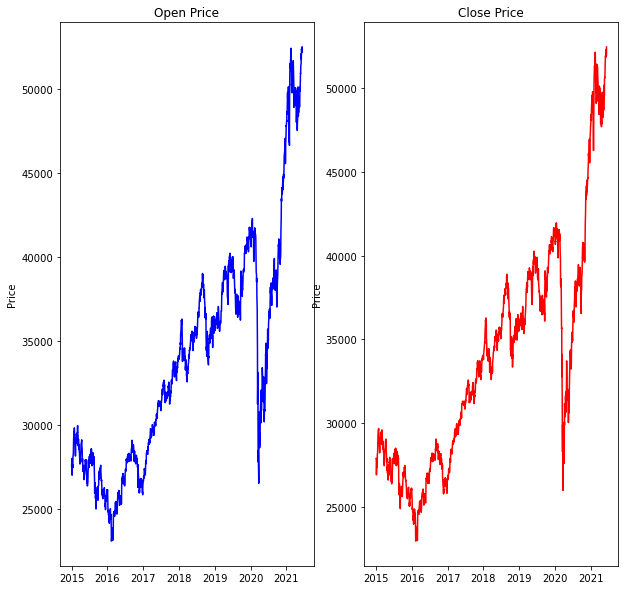

In [9]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.plot(bse_data['Open'], 'b')
plt.title('Open Price')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.plot(bse_data['Close'], 'r')
plt.title('Close Price')
plt.ylabel('Price')

#### 300 EMA vs 300 SMA

EMA : Exponential Moving Average(EMA) is a indicator that tracks the investment over time. EMA is type of moving average which give more weighting and importance to recent price data.

SMA: Simple Moving Average(SMA) is an arithmetic moving average calculated by adding the recent prices and dividing them by number of time periods in calucating average.

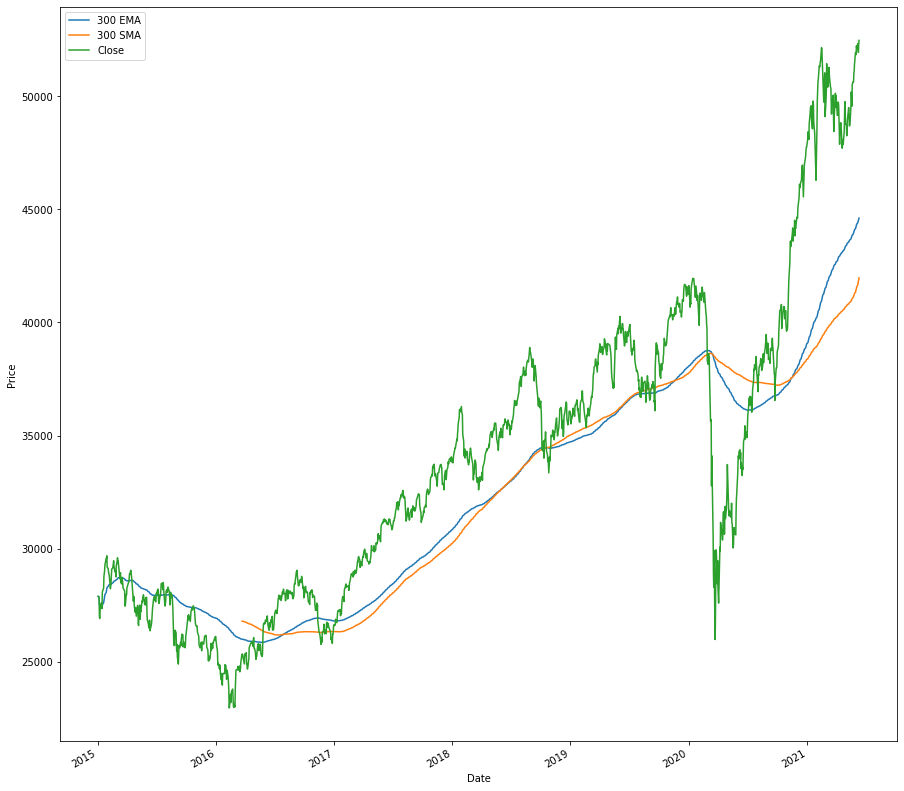

In [10]:
# Visualizing the EMA and SMA of 300 days
bse_data.ewm(span = 300).mean()['Close'].plot(figsize = (15, 15), label = '300 EMA')
bse_data.rolling(window = 300).mean()['Close'].plot(figsize = (15, 15), label = '300 SMA')
bse_data['Close'].plot(label = 'Close')
plt.legend()
plt.ylabel('Price')
plt.show()

In [11]:
training_close = bse_data.loc[:, ['Close']]
training_close

,Close
Date,
2015-01-02,27887.900391
2015-01-05,27842.320312
2015-01-06,26987.460938
2015-01-07,26908.820312
2015-01-08,27274.710938
...,...
2021-06-07,52328.511719
2021-06-08,52275.570312
2021-06-09,51941.640625


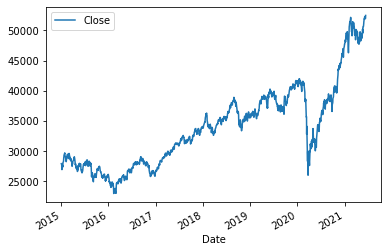

In [12]:
# Plotting the Close price
training_close.plot()

In [13]:
# Processing the Closing price
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
training = scaler.fit_transform(np.array(training_close).reshape(-1, 1))
print(training.shape)

(1581, 1)


In [14]:
train_size = int(len(training) * 0.7)

train = training[0:train_size]
test = training[train_size:]

print(train.shape)
print(test.shape)

(1106, 1)
(475, 1)


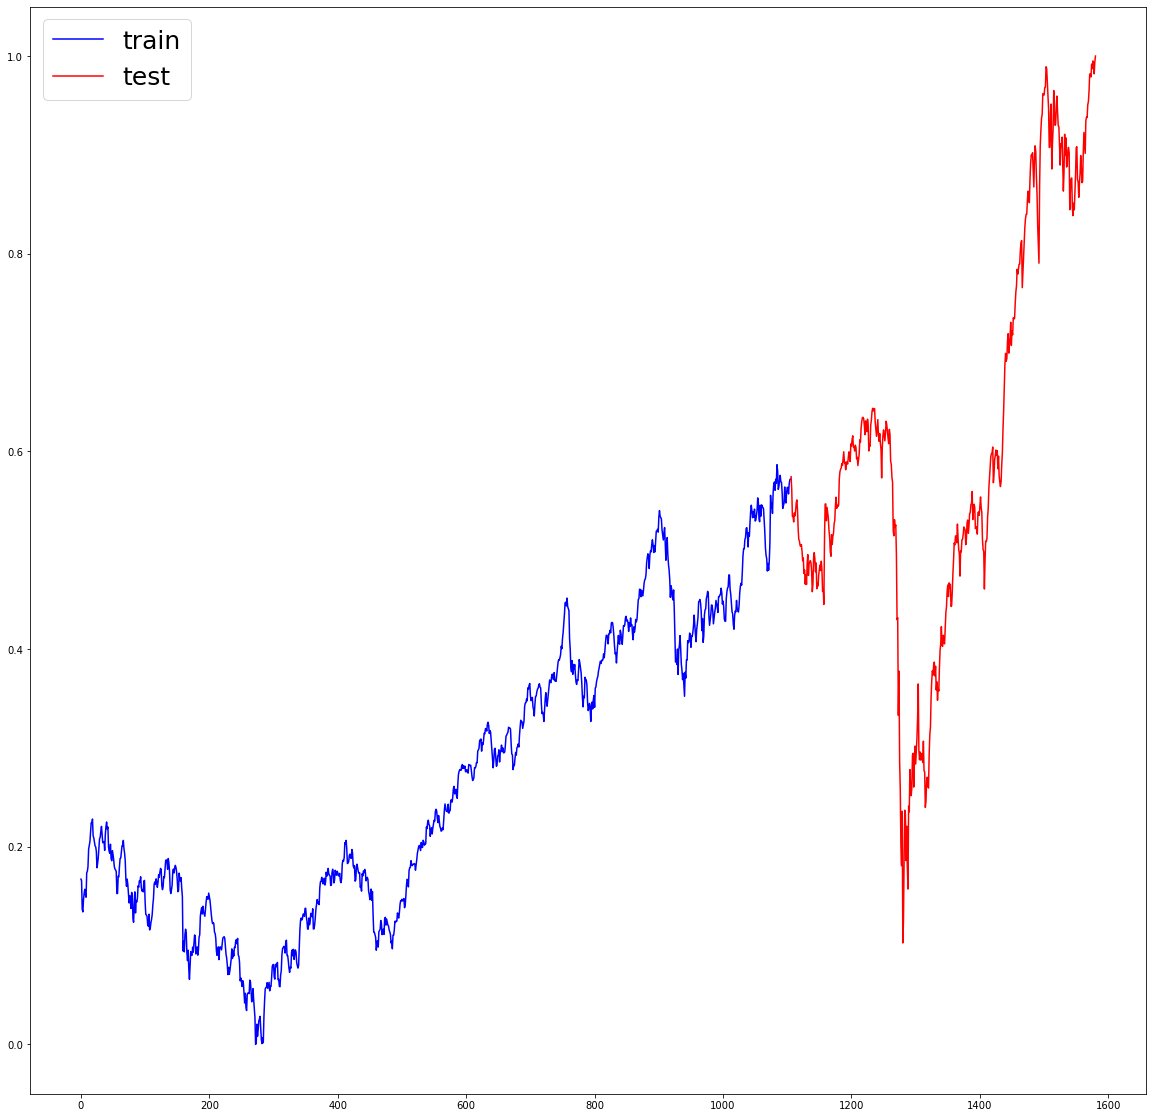

In [15]:
test_plot = np.empty_like(training)
test_plot[:, :] = np.nan
test_plot[len(train):, :] = test

plt.figure(figsize = (20, 20))
plt.plot(train, 'blue', label = 'train')
plt.plot(test_plot, 'red', label = 'test')
plt.legend(loc = 'upper left', fontsize = 25)

##### Data PreProcessing

In [16]:
def values(dataset, timestep):
    x = []
    y = []
    for i in range(len(dataset)-timestep-1):
        x.append(dataset[i:(i + timestep), 0])
        y.append(dataset[i + timestep, 0])
    return np.array(x), np.array(y)

In [17]:
X_train, Y_train = values(train, 100)
X_test, Y_test = values(test, 100)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1005, 100)
(374, 100)
(1005,)
(374,)


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape

(374, 100, 1)

##### Model Building

In [20]:
%%time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50))
model.add(Dropout(0.3))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Wall time: 45.1 s


In [21]:
%%time
model.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
32/32 [==============================] - 21s 206ms/step - loss: 0.0380
Epoch 2/10
32/32 [==============================] - 6s 195ms/step - loss: 0.0031
Epoch 3/10
32/32 [==============================] - 6s 194ms/step - loss: 0.0023
Epoch 4/10
32/32 [==============================] - 6s 197ms/step - loss: 0.0028
Epoch 5/10
32/32 [==============================] - 6s 198ms/step - loss: 0.0021
Epoch 6/10
32/32 [==============================] - 6s 196ms/step - loss: 0.0022
Epoch 7/10
32/32 [==============================] - 6s 195ms/step - loss: 0.0022
Epoch 8/10
32/32 [==============================] - 6s 194ms/step - loss: 0.0017
Epoch 9/10
32/32 [==============================] - 6s 193ms/step - loss: 0.0019
Epoch 10/10
32/32 [==============================] - 6s 196ms/step - loss: 0.0022
Wall time: 1min 18s


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [23]:
%%time
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Wall time: 6.23 s


In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, test_predict)

0.013765492329892246

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

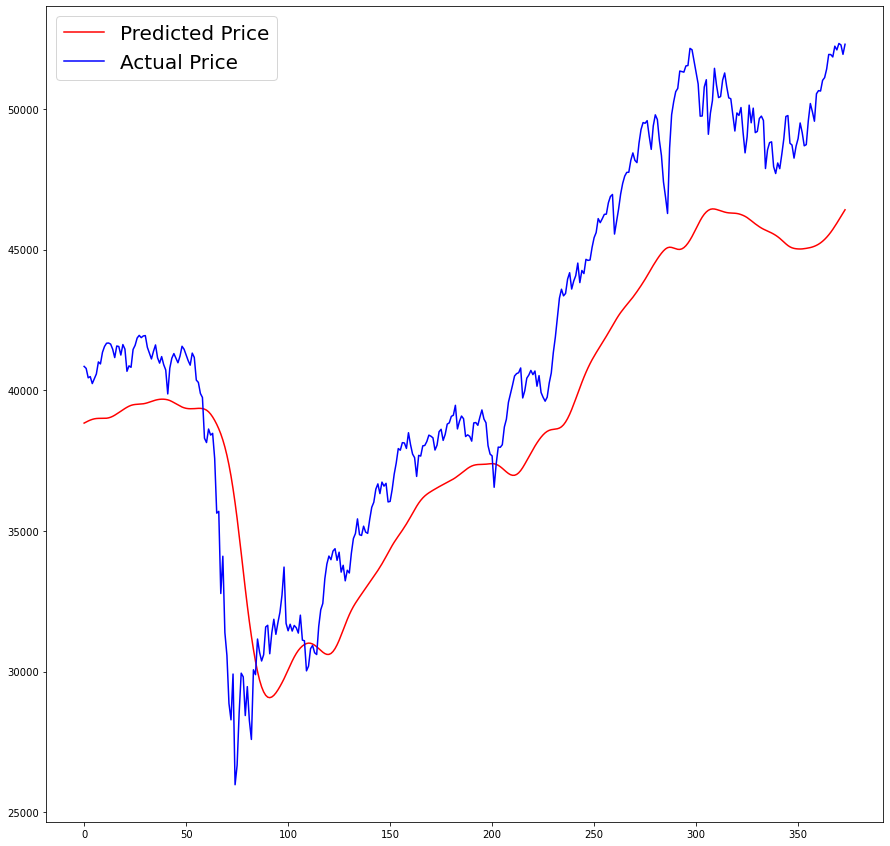

In [26]:
plt.figure(figsize = (15, 15))
plt.plot(test_predict, color = 'red', label = 'Predicted Price')
plt.plot(scaler.inverse_transform(Y_test.reshape(-1, 1)), color = 'blue', label = 'Actual Price')
plt.legend(fontsize = 20)
plt.show()

##### Processing to predict the stocks 

In [27]:
x_input = test[len(test) - 100:, ].reshape(1, -1)

temp = list(x_input)
temp = temp[0].tolist()
len(temp)

100

In [28]:
%%time
lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp) > 100):
        x_input = np.array(temp[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        Y_hat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, Y_hat))
        temp.extend(Y_hat[0].tolist())
        temp = temp[1:]
        lst_output.extend(Y_hat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        Y_hat = model.predict(x_input, verbose = 0)
        print(Y_hat[0])
        temp.extend(Y_hat[0].tolist())
        print(len(temp))
        lst_output.extend(Y_hat.tolist())
        i = i + 1
        
print(lst_output)

[0.8021009]
101
1 day input [0.90208962 0.88347736 0.86754391 0.8957938  0.90913366 0.90346487
 0.87818884 0.86020454 0.82844414 0.81030331 0.79036661 0.86877481
 0.90932327 0.92483769 0.93698212 0.94095665 0.96186042 0.96119343
 0.96052658 0.96805052 0.96848345 0.98913953 0.98744739 0.97388696
 0.96104485 0.94631292 0.90751456 0.9077547  0.94265236 0.95137837
 0.88568976 0.91108871 0.9262312  0.96510803 0.94483327 0.92990393
 0.93111486 0.95090998 0.95951452 0.94300418 0.92955701 0.92850301
 0.90945545 0.8896369  0.91137318 0.90842804 0.91791736 0.88841037
 0.86333875 0.88259087 0.9208011  0.89954882 0.91718527 0.88769945
 0.88912446 0.90471813 0.9075786  0.90233215 0.8444808  0.86685932
 0.8756532  0.87661352 0.8467178  0.83846587 0.8511635  0.84431382
 0.8615229  0.88041089 0.90715956 0.90824691 0.87493104 0.87276866
 0.85701793 0.87138097 0.88060129 0.89932058 0.88778373 0.87182977
 0.87324392 0.90197345 0.92272334 0.91287718 0.90143586 0.93448207
 0.93825602 0.93776938 0.95064033 

8 day output [[0.78309387]]
9 day input [0.82844414 0.81030331 0.79036661 0.86877481 0.90932327 0.92483769
 0.93698212 0.94095665 0.96186042 0.96119343 0.96052658 0.96805052
 0.96848345 0.98913953 0.98744739 0.97388696 0.96104485 0.94631292
 0.90751456 0.9077547  0.94265236 0.95137837 0.88568976 0.91108871
 0.9262312  0.96510803 0.94483327 0.92990393 0.93111486 0.95090998
 0.95951452 0.94300418 0.92955701 0.92850301 0.90945545 0.8896369
 0.91137318 0.90842804 0.91791736 0.88841037 0.86333875 0.88259087
 0.9208011  0.89954882 0.91718527 0.88769945 0.88912446 0.90471813
 0.9075786  0.90233215 0.8444808  0.86685932 0.8756532  0.87661352
 0.8467178  0.83846587 0.8511635  0.84431382 0.8615229  0.88041089
 0.90715956 0.90824691 0.87493104 0.87276866 0.85701793 0.87138097
 0.88060129 0.89932058 0.88778373 0.87182977 0.87324392 0.90197345
 0.92272334 0.91287718 0.90143586 0.93448207 0.93825602 0.93776938
 0.95064033 0.95394959 0.96437065 0.9817999  0.9817131  0.97882049
 0.99179174 0.9873078  

16 day output [[0.71646976]]
17 day input [0.96186042 0.96119343 0.96052658 0.96805052 0.96848345 0.98913953
 0.98744739 0.97388696 0.96104485 0.94631292 0.90751456 0.9077547
 0.94265236 0.95137837 0.88568976 0.91108871 0.9262312  0.96510803
 0.94483327 0.92990393 0.93111486 0.95090998 0.95951452 0.94300418
 0.92955701 0.92850301 0.90945545 0.8896369  0.91137318 0.90842804
 0.91791736 0.88841037 0.86333875 0.88259087 0.9208011  0.89954882
 0.91718527 0.88769945 0.88912446 0.90471813 0.9075786  0.90233215
 0.8444808  0.86685932 0.8756532  0.87661352 0.8467178  0.83846587
 0.8511635  0.84431382 0.8615229  0.88041089 0.90715956 0.90824691
 0.87493104 0.87276866 0.85701793 0.87138097 0.88060129 0.89932058
 0.88778373 0.87182977 0.87324392 0.90197345 0.92272334 0.91287718
 0.90143586 0.93448207 0.93825602 0.93776938 0.95064033 0.95394959
 0.96437065 0.9817999  0.9817131  0.97882049 0.99179174 0.9873078
 0.99504622 0.99325299 0.98194214 0.99409635 1.         0.8021009
 0.80491984 0.8065064  

24 day output [[0.6611923]]
25 day input [0.96104485 0.94631292 0.90751456 0.9077547  0.94265236 0.95137837
 0.88568976 0.91108871 0.9262312  0.96510803 0.94483327 0.92990393
 0.93111486 0.95090998 0.95951452 0.94300418 0.92955701 0.92850301
 0.90945545 0.8896369  0.91137318 0.90842804 0.91791736 0.88841037
 0.86333875 0.88259087 0.9208011  0.89954882 0.91718527 0.88769945
 0.88912446 0.90471813 0.9075786  0.90233215 0.8444808  0.86685932
 0.8756532  0.87661352 0.8467178  0.83846587 0.8511635  0.84431382
 0.8615229  0.88041089 0.90715956 0.90824691 0.87493104 0.87276866
 0.85701793 0.87138097 0.88060129 0.89932058 0.88778373 0.87182977
 0.87324392 0.90197345 0.92272334 0.91287718 0.90143586 0.93448207
 0.93825602 0.93776938 0.95064033 0.95394959 0.96437065 0.9817999
 0.9817131  0.97882049 0.99179174 0.9873078  0.99504622 0.99325299
 0.98194214 0.99409635 1.         0.8021009  0.80491984 0.8065064
 0.80651653 0.80480486 0.80140501 0.79648274 0.79028499 0.78309387
 0.77519161 0.76683611 

In [29]:
day_new = np.arange(1, 101)
day_predict = np.arange(101, 131)

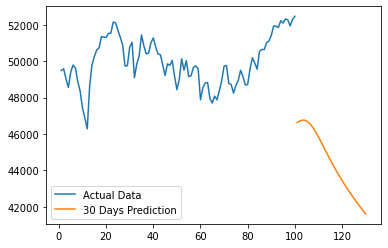

In [30]:
# Visualizing the prediction
plt.plot(day_new, scaler.inverse_transform(training[len(training) - 100:]), label = 'Actual Data')
plt.plot(day_predict, scaler.inverse_transform(lst_output), label = '30 Days Prediction')
plt.legend()

## Textual Analysis

### Sentiment Analysis

In [31]:
# Importing the required libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns

In [32]:
df = pd.read_csv('india-news-headlines.csv')
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [33]:
# Dropping the headline_cateogry variables as it is not required for analysis
df.drop(['headline_category'], axis = 1, inplace = True)

In [34]:
# Converting the publish_date into proper date time variables
df['publish_date'] = pd.to_datetime(df['publish_date'], format = '%Y%m%d')
df['headline_text'] = df['headline_text'].str.lower()
df.columns = ['Date', 'headline']
df.head()

,Date,headline
0,2001-01-02,status quo will not be disturbed at ayodhya; s...
1,2001-01-02,fissures in hurriyat over pak visit
2,2001-01-02,america's unwanted heading for india?
3,2001-01-02,for bigwigs; it is destination goa
4,2001-01-02,extra buses to clear tourist traffic


In [35]:
df.shape

(3424067, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   headline  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.2+ MB


In [37]:
%%time
# Dropping the duplicate data
df['headline'] = df.groupby(df['Date']).transform(lambda x: ' '.join(x))
df = df.drop_duplicates()
df.reset_index(drop = True, inplace = True)
df

Wall time: 4min 43s


,Date,headline
0,2001-01-02,status quo will not be disturbed at ayodhya; s...
1,2001-01-03,powerless north india gropes in the dark think...
2,2001-01-04,the string that pulled stephen hawking to indi...
3,2001-01-05,light combat craft takes india into club class...
4,2001-01-06,light combat craft takes india into club class...
...,...,...
7257,2020-12-27,#biginterview! dhritiman chatterjee: nobody da...
7258,2020-12-28,horoscope today; 28 december 2020: check astro...
7259,2020-12-29,man recovers charred remains of 'thief' from h...
7260,2020-12-30,numerology readings 30 december 2020: predicti...


##### Checking the missing values in the data

In [38]:
df.isnull().sum()

Date        0
headline    0
dtype: int64

##### Calculating the Polarity and Subjectivity of the text

Polarity: Polarity is a value in the range of -1 to 1, where value closer to 1 is a positive statement and value closer to -1 is a negative statement.

Subjectivity: Sbjectivity is a value in the range of 0 to 1, where value close to 0 indicates a factual information and value closer to 1 is referred to as personal opinion, emotion or judgement.

In [39]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

Wall time: 9min 48s


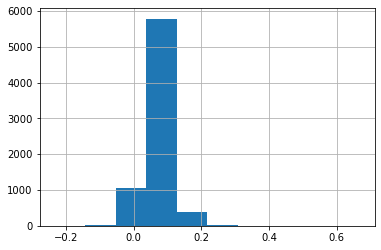

In [40]:
%%time
df['Subjectivity'] = df['headline'].apply(getSubjectivity)
df['Polarity'] = df['headline'].apply(getPolarity)
df['Polarity'].hist()

##### Analyzing the positive, negative, neutral and compound scores of the texts

In [41]:
%%time
analyzer = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []

for i in df['headline']:
    score = analyzer.polarity_scores(i)
    negative.append(score['neg'])
    neutral.append(score['neu'])
    positive.append(score['pos'])
    compound.append(score['compound'])
    
df['Negative'] = np.array(negative)
df['Neutral'] = np.array(neutral)
df['Positive'] = np.array(positive)
df['Compound'] = np.array(compound)
df    

Wall time: 26min 2s


,Date,headline,Subjectivity,Polarity,Negative,Neutral,Positive,Compound
0,2001-01-02,status quo will not be disturbed at ayodhya; s...,0.282333,0.151333,0.122,0.807,0.071,-0.9811
1,2001-01-03,powerless north india gropes in the dark think...,0.407692,0.088462,0.122,0.766,0.111,-0.2640
2,2001-01-04,the string that pulled stephen hawking to indi...,0.446847,0.087961,0.100,0.797,0.103,0.8738
3,2001-01-05,light combat craft takes india into club class...,0.476612,0.262024,0.122,0.721,0.157,0.9816
4,2001-01-06,light combat craft takes india into club class...,0.439394,0.248485,0.152,0.704,0.143,-0.4215
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#biginterview! dhritiman chatterjee: nobody da...,0.395808,0.035886,0.129,0.793,0.078,-0.9997
7258,2020-12-28,horoscope today; 28 december 2020: check astro...,0.412945,0.070517,0.138,0.769,0.093,-0.9998
7259,2020-12-29,man recovers charred remains of 'thief' from h...,0.424021,0.061210,0.150,0.754,0.096,-0.9999
7260,2020-12-30,numerology readings 30 december 2020: predicti...,0.441660,0.043496,0.143,0.775,0.081,-0.9999


##### Merging the Closing price dataframe with the sentiment analysis data

In [42]:
%%time
df_merge = pd.merge(training_close['Close'], df, on = 'Date')
df_merge

Wall time: 261 ms


,Date,Close,headline,Subjectivity,Polarity,Negative,Neutral,Positive,Compound
0,2015-01-02,27887.900391,drink smart with these party tips how to say s...,0.455678,0.058540,0.146,0.741,0.113,-0.9997
1,2015-01-05,27842.320312,recipe: strawberry cupcakes recipe: kaju jeera...,0.433587,0.097769,0.129,0.758,0.113,-0.9989
2,2015-01-06,26987.460938,turn to gardening for happiness teeth jeweller...,0.386579,0.055777,0.116,0.804,0.079,-0.9997
3,2015-01-07,26908.820312,can ex-lovers be friends? is water diet bad fo...,0.385529,0.033072,0.169,0.745,0.086,-1.0000
4,2015-01-08,27274.710938,how to do a home manicure recipe: spiced beetr...,0.408689,0.061495,0.143,0.774,0.083,-0.9999
...,...,...,...,...,...,...,...,...,...
1469,2020-12-24,46973.539062,how to set the mood for sex during cold winter...,0.390942,0.048166,0.092,0.838,0.069,-0.9984
1470,2020-12-28,47353.750000,horoscope today; 28 december 2020: check astro...,0.412945,0.070517,0.138,0.769,0.093,-0.9998
1471,2020-12-29,47613.078125,man recovers charred remains of 'thief' from h...,0.424021,0.061210,0.150,0.754,0.096,-0.9999
1472,2020-12-30,47746.218750,numerology readings 30 december 2020: predicti...,0.441660,0.043496,0.143,0.775,0.081,-0.9999


In [43]:
test_hybrid = df_merge[['Close', 'Subjectivity', 'Polarity', 'Negative', 'Neutral', 'Positive', 'Compound']]
test_hybrid

,Close,Subjectivity,Polarity,Negative,Neutral,Positive,Compound
0,27887.900391,0.455678,0.058540,0.146,0.741,0.113,-0.9997
1,27842.320312,0.433587,0.097769,0.129,0.758,0.113,-0.9989
2,26987.460938,0.386579,0.055777,0.116,0.804,0.079,-0.9997
3,26908.820312,0.385529,0.033072,0.169,0.745,0.086,-1.0000
4,27274.710938,0.408689,0.061495,0.143,0.774,0.083,-0.9999
...,...,...,...,...,...,...,...
1469,46973.539062,0.390942,0.048166,0.092,0.838,0.069,-0.9984
1470,47353.750000,0.412945,0.070517,0.138,0.769,0.093,-0.9998
1471,47613.078125,0.424021,0.061210,0.150,0.754,0.096,-0.9999
1472,47746.218750,0.441660,0.043496,0.143,0.775,0.081,-0.9999


In [44]:
new_df = pd.DataFrame(scaler.fit_transform(test_hybrid))
new_df.columns = test_hybrid.columns
new_df

,Close,Subjectivity,Polarity,Negative,Neutral,Positive,Compound
0,0.199039,0.880401,0.441347,0.468254,0.285714,0.508475,0.00015
1,0.197201,0.722400,0.652796,0.333333,0.396104,0.508475,0.00055
2,0.162730,0.386186,0.426457,0.230159,0.694805,0.220339,0.00015
3,0.159559,0.378678,0.304075,0.650794,0.311688,0.279661,0.00000
4,0.174313,0.544322,0.457276,0.444444,0.500000,0.254237,0.00005
...,...,...,...,...,...,...,...
1469,0.968637,0.417394,0.385432,0.039683,0.915584,0.135593,0.00080
1470,0.983968,0.574767,0.505904,0.404762,0.467532,0.338983,0.00010
1471,0.994425,0.653985,0.455741,0.500000,0.370130,0.364407,0.00005
1472,0.999794,0.780139,0.360262,0.444444,0.506494,0.237288,0.00005


##### Data PreProcessing

In [45]:
# Create X and Y variables for independent and dependent values
X = new_df.drop('Close', axis = 1)
Y = new_df['Close']
Y

0       0.199039
1       0.197201
2       0.162730
3       0.159559
4       0.174313
          ...   
1469    0.968637
1470    0.983968
1471    0.994425
1472    0.999794
1473    1.000000
Name: Close, Length: 1474, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [47]:
# Creating the model
xgb_model = xgb.XGBRegressor()

# Fitting the model on train data
xgb_model.fit(X_train, Y_train)

# Predicting the model
Y_pred = xgb_model.predict(X_test)

##### Evaluating the model

In [48]:
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_pred))

Mean Squared Error:  0.04561851889594077
